# Dataset 1 : AirBnB Open Data from Seattle

Source : https://www.kaggle.com/airbnb/seattle

Default problem is Regression. Feel free to define your own.

Primary Data : The dataset posted by AirBnB on Kaggle.
Join the Kaggle platform to obtain the AirBnB Dataset.
This is NOT a Competition. NO participation is needed.


# Objectives of Project

> 1. To Maximise Revenue of AirBnbs' Hosts
 >> a. Clean Dataset, Removing Insignificant Datapoints
 <br> b. Explore Remaining Data, and Remove Data Columns that are Replicas
 <br> c. Identify Relationship of Remaining Data with 'price'
 <br> d. Narrow Down Important Factors which have a Positive Relationship with 'price'
 <br> e. How these Important Factors are Possible Ways that Hosts can Maximise Revenue

> 2. Identify and Determine the Best Regression Model for this Specific AirBnb Dataset
 >> a. 1st Model: Random Forest Generator
 <br> b. 2nd Model: Linear Regression
 <br> c. 3rd Model: Stochastic Gradient Descent Model (SGD Regressor)
 <br> d. Determine Adjusted R^2 and Identify Most Suitable Model
 


In [149]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

# Import Essential Libraries 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 160)

In [150]:
# Import CSV File as DataFrame and Check if Imported Correctly
listing_data = pd.read_csv("listings.csv")
listing_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [151]:
# Check Data Size
print("(Rows, Columns) =", listing_data.shape)

(Rows, Columns) = (3818, 92)


In [152]:
#To obtain the Index of the datas hence we know what needs to be removed
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Some of the data is irrelevant for us hence we need to clean the data.

# Cleaning the data, part I

<br> Identify and remove the unwanted variables
<br> Check for missing datas
<br> Drop nan values
<br> Turn price (string with dollar sign) to number

In [153]:
# Dictionary for the Index of Data we have Identified to be Removed
indexdropdict = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
                 20,21,22,23,24,26,27,31,32,34,35,40,41,42,43,44,
                 58,59,62,66,68,69,70,71,72,74,75,77,78,79,80,81,82,83,84,85,88,89,90,91]

# Empty Dictionary to Append the String Names of Columns Identified
stringdict = []

# Append the String Variables
for index in indexdropdict:
    stringdict.append(listing_data.columns[index])
    
# Loop to Drop Identified Data
for variable in stringdict:
    listing_data.drop([variable], axis = 1, inplace = True)

In [154]:
# With data removed, check the size of data again,hence should have 32 datas left
print("(Rows, Columns) = ", listing_data.shape)

# Print Info() to Check the remaining data is desired
print(listing_data.info())

(Rows, Columns) =  (3818, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             3816 non-null   object 
 1   host_neighbourhood            3518 non-null   object 
 2   host_listings_count           3816 non-null   float64
 3   host_total_listings_count     3816 non-null   float64
 4   host_identity_verified        3816 non-null   object 
 5   neighbourhood_cleansed        3818 non-null   object 
 6   neighbourhood_group_cleansed  3818 non-null   object 
 7   city                          3818 non-null   object 
 8   state                         3818 non-null   object 
 9   latitude                      3818 non-null   float64
 10  longitude                     3818 non-null   float64
 11  is_location_exact             3818 non-null   object 
 12  property_type                 38

<AxesSubplot:>

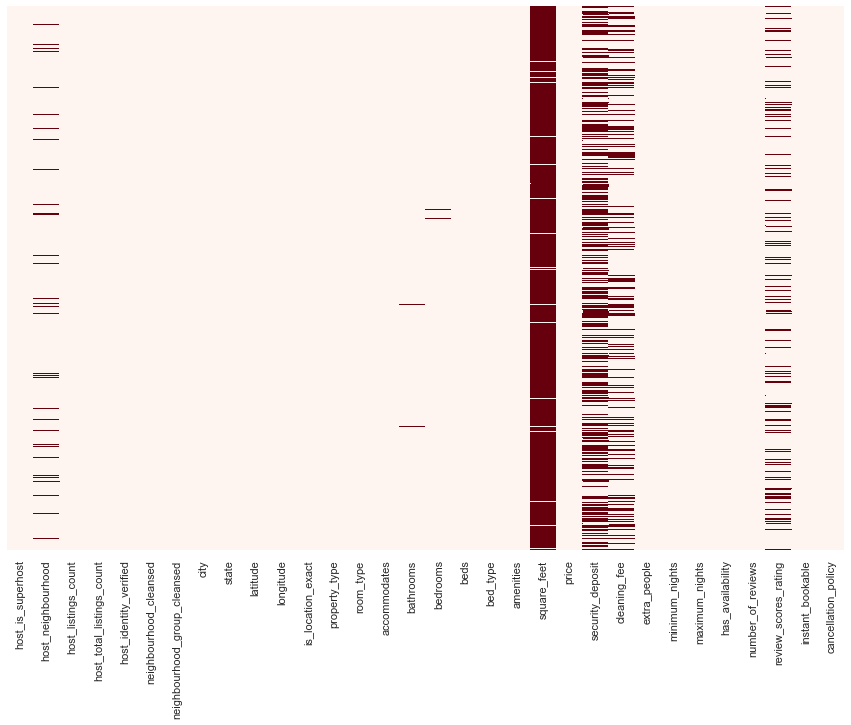

In [155]:
# Plotting heatmap to check and identify Datas that is relevant but are unusable due to Large Numbers of Missing Datasets
fig, axes = plt.subplots(figsize = (15,10))
sb.heatmap(listing_data.isnull(), yticklabels = False, cbar = False, cmap='Reds')

## From Heatmap:

At first glance from the heatmap, "host_neighbourhood, "bathrooms", "bedrooms", "square_feet", "security_deposit", "cleaning_fee", "review_scores_rating" have significant numbers of missing data and we should remove them.

However, upon closer inspection of the CSV file, we noticed that for "cleaning_fee" and "security_deposit", the empty cells represent there is no associated cost with that service. Hence, we will be replacing the NaN values with 0.

For the "host_neighbourhood", there are many empty cells when we check with .value_counts(). Reason may be that the host might have forgot to include it in. Since there are quite a number of missing datas, we will remove it.

For the "bathrooms" and "bedrooms", it is an important factor for users while choosing an AirBnb hence, we should keep the variables.

For the 'square_feet', there are many empty cells when we look closer at the CSV file. Reason may be that host may not know the size of the space therefore they left it empty. Hence, the data might be unreliable and we will remove it.

For "review_scores_rating", the empty cells are AirBnb listings with no reviews yet. This may mean that may not have occupants before or that the occupants did not give any reviews. 
With reference to the statement above, it is possible that listings with review scores may not be suitable to be used to determine the problem stated. The data may be biased as some occupants did not give a review and different occupant has different expextations with the space. Hence, this can give us biased/skewed/inaccurate data and therefore the data is deem unreliable and we will remove them.

Note: Remove the "$", and convert to float64/int to be able to utilize these data as numerics.

In [156]:
# Data Drop as Required hence there should be 29 datas left
listing_data.drop(['host_neighbourhood', 'square_feet', 'review_scores_rating'], axis = 1, inplace = True)

# Check if Correct Data is Removed - there should be 29 Remaining Columns
print("(Rows, Columns) =", listing_data.shape)
print(listing_data.info())

(Rows, Columns) = (3818, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             3816 non-null   object 
 1   host_listings_count           3816 non-null   float64
 2   host_total_listings_count     3816 non-null   float64
 3   host_identity_verified        3816 non-null   object 
 4   neighbourhood_cleansed        3818 non-null   object 
 5   neighbourhood_group_cleansed  3818 non-null   object 
 6   city                          3818 non-null   object 
 7   state                         3818 non-null   object 
 8   latitude                      3818 non-null   float64
 9   longitude                     3818 non-null   float64
 10  is_location_exact             3818 non-null   object 
 11  property_type                 3817 non-null   object 
 12  room_type                     381

Once we have the data that we needed, we can start cleaning the data.


In [157]:
# replacing NaN values with 0
listing_data.fillna(0, inplace=True)

# Clean "$", ",", and ".00" for 'security_deposit', 'cleaning_fee', 'price' and 'extra_people'

# For Security Deposit
count = 0
for x in listing_data['security_deposit']:
    if x != 0:
        listing_data['security_deposit'][count] = listing_data['security_deposit'][count].replace('$','')
        listing_data['security_deposit'][count] = listing_data['security_deposit'][count].replace(',','')
        listing_data['security_deposit'][count] = listing_data['security_deposit'][count].replace('.00','')
        count += 1
    else: 
        count += 1
        continue


# For Cleaning Fee
count = 0
for x in listing_data['cleaning_fee']:
    if x != 0:
        listing_data['cleaning_fee'][count] = listing_data['cleaning_fee'][count].replace('$','')
        listing_data['cleaning_fee'][count] = listing_data['cleaning_fee'][count].replace(',','')
        listing_data['cleaning_fee'][count] = listing_data['cleaning_fee'][count].replace('.00','')
        count += 1
    else: 
        count += 1
        continue


# For Price        
count = 0
for x in listing_data['price']:
    if x != 0:
        listing_data['price'][count] = listing_data['price'][count].replace('$','')
        listing_data['price'][count] = listing_data['price'][count].replace(',','')
        listing_data['price'][count] = listing_data['price'][count].replace('.00','')
        count += 1
    else: 
        count += 1
        continue
        
# For extra_people       
count = 0
for x in listing_data['extra_people']:
    if x != 0:
        listing_data['extra_people'][count] = listing_data['extra_people'][count].replace('$','')
        listing_data['extra_people'][count] = listing_data['extra_people'][count].replace(',','')
        listing_data['extra_people'][count] = listing_data['extra_people'][count].replace('.00','')
        count += 1
    else: 
        count += 1
        continue

In [158]:
# Check that the datas has been converted correctly
print(listing_data['security_deposit'].head())
print(listing_data['cleaning_fee'].head())
print(listing_data['price'].head())
print(listing_data['extra_people'].head())

0       0
1     100
2    1000
3       0
4     700
Name: security_deposit, dtype: object
0      0
1     40
2    300
3      0
4    125
Name: cleaning_fee, dtype: object
0     85
1    150
2    975
3    100
4    450
Name: price, dtype: object
0     5
1     0
2    25
3     0
4    15
Name: extra_people, dtype: object


<AxesSubplot:>

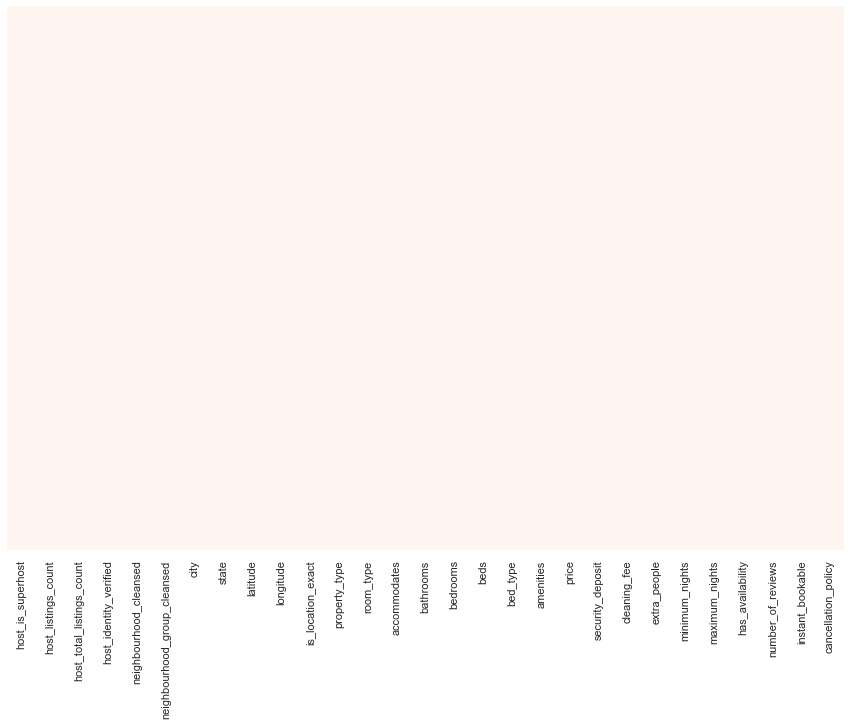

In [159]:
# Check using Heatmap again, the Factors which were filled with NaN and Cleaned should not have any Missing Data
fig, axes = plt.subplots(figsize = (15,10))
sb.heatmap(listing_data.isnull(), yticklabels = False, cbar = False, cmap = 'Reds')

## Explore and Identify Variables 
### Keep the variables that may have strong relationship with "Price"
### Remove variables that are not useful for predicting "Price"

In [160]:
# This variable can be kept- Check Relationship with Price

listing_data['host_is_superhost'].value_counts() 

# NaN Rows for host_is_superhost. We will remove these rows.

listing_data['host_is_superhost'].fillna('z', inplace = True)
dropdata = listing_data[(listing_data['host_is_superhost'] == 'z')].index 
listing_data.drop(dropdata, inplace = True)

In [161]:
#We can remove this variable as it is same as host_total_listings_count

listing_data['host_listings_count'].value_counts() 

1.0      2179
2.0       620
3.0       261
4.0       151
5.0        98
34.0       67
6.0        48
48.0       46
169.0      39
37.0       37
36.0       36
7.0        30
9.0        28
10.0       26
8.0        23
11.0       22
21.0       21
18.0       19
17.0       16
13.0       12
12.0       12
354.0      10
163.0       4
19.0        4
15.0        3
84.0        2
502.0       2
0.0         2
Name: host_listings_count, dtype: int64

In [162]:
#We can keep this varitable as repeated column of host_listings_count will be removed
    
listing_data['host_total_listings_count'].value_counts()

# Change DType to int64

listing_data['host_total_listings_count'] = listing_data['host_total_listings_count'].astype('int64')

# NaN Rows for host_total_listings_count. We will remove these rows.

listing_data['host_total_listings_count'].fillna('z', inplace = True)
dropdata = listing_data[(listing_data['host_total_listings_count'] == 'z')].index 
listing_data.drop(dropdata, inplace = True)

In [163]:
# This variable can be kept - users can understand if the host is real or not

listing_data['host_identity_verified'].value_counts()

t    2997
f     819
0       2
Name: host_identity_verified, dtype: int64

In [164]:
# This variable can be removed as it is almost the same as 'neighbourhood_group_cleansed'

listing_data['neighbourhood_cleansed'].value_counts()

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Ravenna                       67
Mann                          67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
Green Lake                    54
North Queen Anne              54
Leschi                        53
Atlantic                      53
Loyal Heights                 52
Mount Baker                   50
North Admiral                 49
Madrona                       47
Eastlake                      45
Seward Park                   44
Maple Leaf

In [165]:
# This variable can be kept- Check Relationship with Price

listing_data['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [166]:
# Remove as the data collected are generally in Seattle
# Some of the data include the neighbourhood in Seattle but this data can also be found in neighbourhood_group_cleansed.

listing_data['city'].value_counts() 

Seattle                  3810
West Seattle                2
Seattle                     2
seattle                     1
西雅图                         1
Phinney Ridge Seattle       1
Ballard, Seattle            1
Name: city, dtype: int64

In [167]:
# Remove as States are all the same, Washington DC
    
listing_data['state'].value_counts()

WA    3817
wa       1
Name: state, dtype: int64

In [168]:
# Remove as there is quite a handful of datas that is false 
# meaning the location stated is not the exact location of the AirBnB
    
listing_data['is_location_exact'].value_counts()

t    3412
f     406
Name: is_location_exact, dtype: int64

In [169]:
# This variable can be kept- Check Relationship with Price

listing_data['property_type'].value_counts()

# NaN Rows for property_type. We will remove these rows.

listing_data['property_type'].fillna('z', inplace = True)
dropdata = listing_data[(listing_data['property_type'] == 'z')].index 
listing_data.drop(dropdata, inplace = True)

In [170]:
# This variable can be kept- Check Relationship with Price

listing_data['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [171]:
# This variable can be kept- Check Relationship with Price

listing_data['accommodates'].value_counts()

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
14       3
11       3
15       2
Name: accommodates, dtype: int64

In [172]:
# This variable can be kept- Check Relationship with Price

listing_data['bathrooms'].value_counts()

1.0    2882
2.0     373
1.5     248
2.5     124
3.0      64
3.5      57
0.5      31
0.0      24
4.0       8
4.5       3
5.0       2
8.0       2
Name: bathrooms, dtype: int64

In [173]:
# This variable can be kept- Check Relationship with Price

listing_data['bedrooms'].value_counts()

1.0    2417
2.0     640
0.0     378
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [174]:
# This variable can be kept- Check Relationship with Price

listing_data['beds'].value_counts()

1.0     2201
2.0      912
3.0      433
4.0      152
5.0       73
6.0       21
7.0       14
9.0        4
8.0        4
10.0       2
0.0        1
15.0       1
Name: beds, dtype: int64

In [175]:
# We can remove this vairable - Proportion of data other than 'Real Bed' is very low, only 4.21% so the data is very skewed.

listing_data['bed_type'].value_counts() 

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [176]:
# We can remove this variable as there are too many combinations to determine what amenities are actually useful.

listing_data['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                      45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                  11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}    10
{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Buzzer/Wireless Intercom",Heating,Washer,Dryer,Ess

In [177]:
# This variable can be kept- Check Relationship with Price

listing_data['price'].value_counts()

# Change DType to float64

listing_data['price'] = listing_data['price'].astype('float64')

In [178]:
# This variable can be kept- Check Relationship with Price

listing_data['security_deposit'].value_counts()

# Change DType to float64

listing_data['security_deposit'] = listing_data['security_deposit'].astype('float64')

In [179]:
# This variable can be kept- Check Relationship with Price

listing_data['cleaning_fee'].value_counts()

# Change DType to float64

listing_data['cleaning_fee'] = listing_data['cleaning_fee'].astype('float64')

In [180]:
# This variable can be kept- Check Relationship with Price

listing_data['extra_people'].value_counts()

# Change DType to float64

listing_data['extra_people'] = listing_data['extra_people'].astype('float64')

In [181]:
# We can keep this variable as it might be relevant as travellers/visitors do not stay for very long periods of time.
# But we should drop anomaly of '1000' nights as it will skew data, and it is also unrealistic for common travellers.

listing_data['minimum_nights'].value_counts() 

#Drop 1000 minimum_nights Data Row

min_nightsdata= listing_data[(listing_data['minimum_nights']==1000)].index
listing_data.drop(min_nightsdata, inplace=True)

In [182]:
#We can remove this variable as most visitors will not look for long term lodging therefore the data is irrelevant.

listing_data['maximum_nights'].value_counts() 

1125      2452
30         183
365        148
14         123
7          108
90          85
60          69
10          58
180         55
29          51
28          47
21          39
15          38
5           38
31          32
3           29
6           26
4           24
120         20
20          17
730         16
9            9
13           9
45           8
100          8
2            8
8            7
27           6
35           6
1            5
200          5
32           5
25           5
16           5
22           5
360          5
150          4
11           4
65           4
40           4
93           3
12           3
50           3
99           3
26           3
24           3
23           2
18           2
33           2
125          2
270          2
1000         2
183          2
999          1
91           1
95           1
400          1
19           1
100000       1
500          1
352          1
330          1
260          1
234          1
160          1
70           1
44        

In [183]:
# This variable can be removed as all the listings are available

listing_data['has_availability'].value_counts()

t    3817
Name: has_availability, dtype: int64

In [184]:
#We should remove this vairable as it might not be as accurate as some of the guest may not leave reviews for the host when they stayed

listing_data['number_of_reviews'].value_counts()

0      627
1      310
2      224
4      160
3      157
      ... 
404      1
320      1
294      1
278      1
353      1
Name: number_of_reviews, Length: 195, dtype: int64

In [185]:
# This variable can be kept- Check Relationship with Price

listing_data['instant_bookable'].value_counts()

f    3226
t     591
Name: instant_bookable, dtype: int64

In [186]:
# This variable can be kept- Check Relationship with Price

listing_data['cancellation_policy'].value_counts()

strict      1417
moderate    1250
flexible    1150
Name: cancellation_policy, dtype: int64

In [187]:
# Notice there are empty columns in certain rows, we will fill NaN with 0
listing_data['bathrooms'].fillna(0, inplace = True)
listing_data['bedrooms'].fillna(0, inplace = True)
listing_data['beds'].fillna(0, inplace = True)

# Combine bathrooms and bedrooms into no_of_rooms
listing_data['no_of_rooms'] = listing_data['bathrooms'] + listing_data['bedrooms']

In [188]:
# Drop variables as neccessary
# Drop 'bathrooms' and 'bedrooms' as already combined them into 'no_of_rooms'
listing_data.drop(['host_listings_count', 'city', 'state', 
                   'is_location_exact', 'bathrooms', 
                   'bedrooms', 'bed_type', 'amenities', 
                   'maximum_nights', 'has_availability', 'number_of_reviews'], 
                  axis = 1, inplace = True)

# Check if Correct Data is removed, should have 19 Columns
print("(Rows, Columns) =", listing_data.shape)
print(listing_data.info())

(Rows, Columns) = (3817, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             3817 non-null   object 
 1   host_total_listings_count     3817 non-null   int64  
 2   host_identity_verified        3817 non-null   object 
 3   neighbourhood_cleansed        3817 non-null   object 
 4   neighbourhood_group_cleansed  3817 non-null   object 
 5   latitude                      3817 non-null   float64
 6   longitude                     3817 non-null   float64
 7   property_type                 3817 non-null   object 
 8   room_type                     3817 non-null   object 
 9   accommodates                  3817 non-null   int64  
 10  beds                          3817 non-null   float64
 11  price                         3817 non-null   float64
 12  security_deposit              381

In [189]:
# Check the data again after cleaning
listing_data.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,instant_bookable,cancellation_policy,no_of_rooms
0,f,3,t,West Queen Anne,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,85.0,0.0,0.0,5.0,1,f,moderate,2.0
1,t,6,t,West Queen Anne,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,150.0,100.0,40.0,0.0,2,f,strict,2.0
2,f,2,t,West Queen Anne,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,7.0,975.0,1000.0,300.0,25.0,4,f,strict,9.5
3,f,1,t,West Queen Anne,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,2.0,100.0,0.0,0.0,0.0,1,f,flexible,1.0
4,f,2,t,West Queen Anne,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,3.0,450.0,700.0,125.0,15.0,1,f,strict,5.0


<AxesSubplot:>

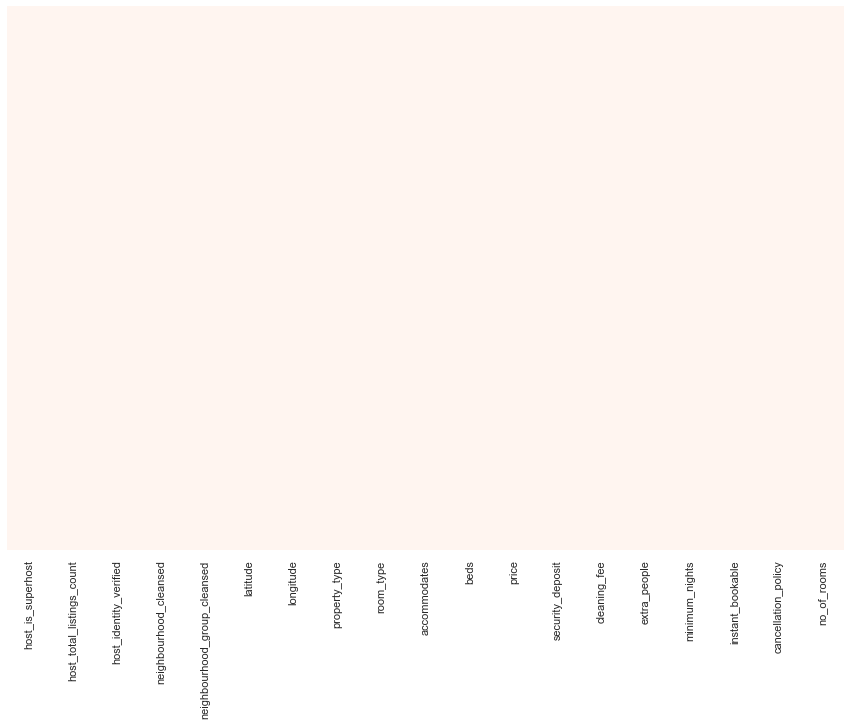

In [190]:
# Check using Heatmap again. The whole dataset should have no NaN data.
fig, axes = plt.subplots(figsize = (15,10))
sb.heatmap(listing_data.isnull(), yticklabels = False, cbar = False, cmap = 'Reds')

## Data has been cleaned, and we will move on to Explore the Data, and Identify the Usefulness of each type of Data in our Project Objectives

### Exploration of Non-Numeric Data 

In [191]:
superhost_price = listing_data[['host_is_superhost','price']].groupby(['host_is_superhost']).mean().sort_values('price', ascending=False)
print(superhost_price)

                        price
host_is_superhost            
0                  174.500000
t                  130.140103
f                  127.383932


<AxesSubplot:xlabel='host_is_superhost'>

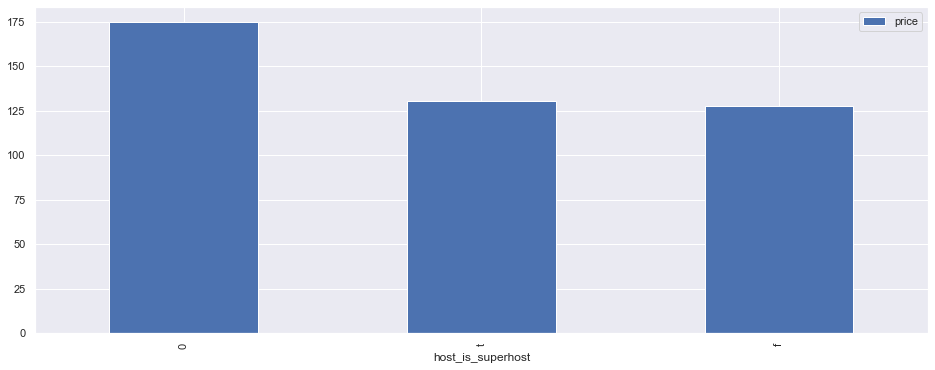

In [192]:
superhost_price.plot.bar(figsize = (16,6))

We observed that host_is_superhost is not an important factor in determining the price since the prices as seen from the barplots are similar.

In [193]:
identity_verified_price = listing_data[['host_identity_verified','price']].groupby(['host_identity_verified']).mean().sort_values('price', ascending=False)
print(identity_verified_price)

                             price
host_identity_verified            
0                       174.500000
t                       128.205539
f                       126.995110


We noticed that the amount of host who identified themselve is limited hence, it will hinder our investigation. Therefore, we can remove this variable

<AxesSubplot:xlabel='host_identity_verified'>

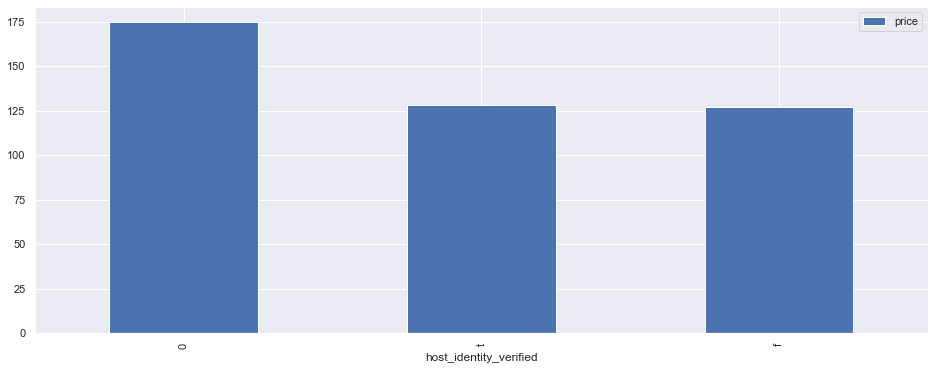

In [194]:
identity_verified_price.plot.bar(figsize = (16,6))

In [195]:
neighbourhood_price = listing_data[['neighbourhood_group_cleansed','price']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('price', ascending=False)
print(neighbourhood_price)

                                   price
neighbourhood_group_cleansed            
Magnolia                      177.672131
Queen Anne                    157.223729
Downtown                      154.405660
West Seattle                  141.359606
Cascade                       140.101124
Capitol Hill                  130.558304
Central Area                  128.338753
Ballard                       124.682609
Other neighborhoods           119.968514
Interbay                      109.727273
Seward Park                   108.477273
Beacon Hill                    94.669492
University District            93.639344
Lake City                      92.671642
Rainier Valley                 91.899371
Northgate                      88.550000
Delridge                       83.278481


<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

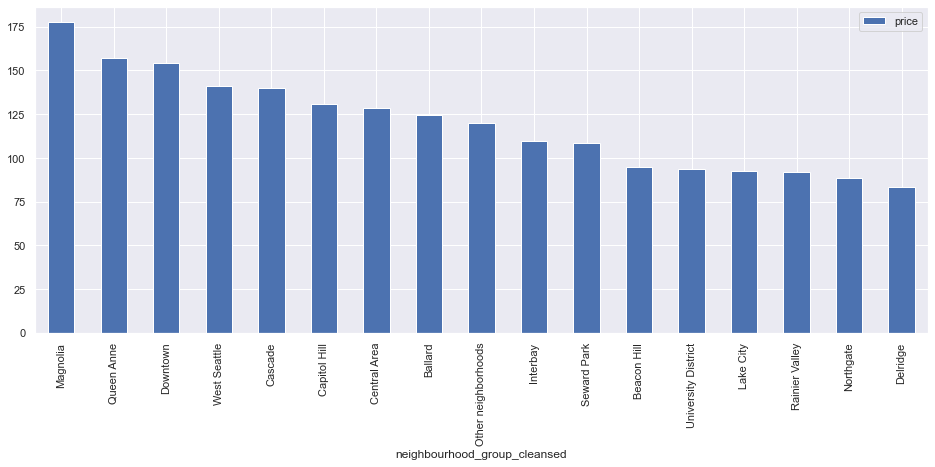

In [196]:
neighbourhood_price.plot.bar(figsize = (16,6))

Note: The locations of different neighbourhoods can be seen to affect the price. Locations such as Magnolia and Queen Anne are generally more expensive than places located at Delridge and Northgate.

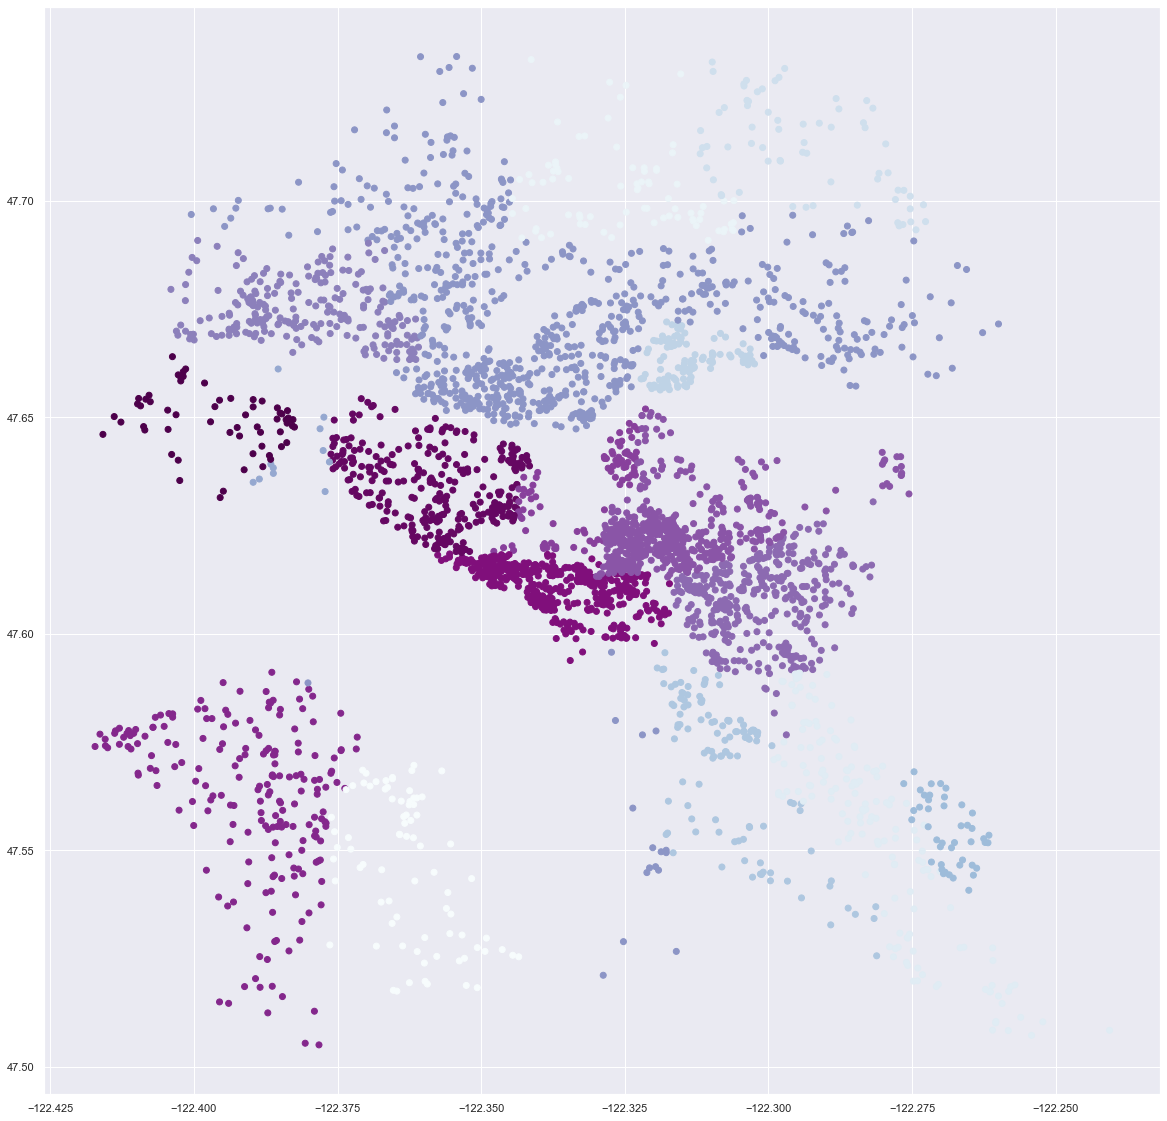

In [197]:
# Plot Map to visualize location of AirBnbs with higher rental prices
neighbourhood_plot = listing_data[['neighbourhood_group_cleansed','longitude','latitude','price']]

# Use a for loop to give a colour to each neighbourhood starting from the one with the highest price
color_value = 18
for x in neighbourhood_price.index: 
    neighbourhood_plot.at[neighbourhood_plot['neighbourhood_group_cleansed'] == x, 'color'] = color_value
    color_value -= 1

# Plot
plt.figure(figsize=(20, 20))
ax = plt.subplot(1, 1, 1)

ax.set_ylim([47.5, 47.8])
ax.set_autoscaley_on(True)
ax.set_xlim([-122.4, -122.1])
ax.set_autoscalex_on(True)
plt.scatter(neighbourhood_plot['longitude'],
            neighbourhood_plot['latitude'],
            cmap="BuPu",
            c=neighbourhood_plot['color'])

Neighbourhoods which are more expensive are darker in colour as depicted in the scatter plot above.

In [198]:
property_price = listing_data[['property_type','price']].groupby(['property_type']).mean().sort_values('price', ascending=False)
print(property_price)

                      price
property_type              
Boat             282.375000
Condominium      151.109890
Loft             135.700000
House            132.351414
Townhouse        129.457627
Apartment        122.916813
Camper/RV        120.461538
0                120.000000
Bungalow         115.615385
Bed & Breakfast  112.054054
Cabin            104.666667
Treehouse        101.000000
Yurt             100.000000
Chalet            98.500000
Other             94.681818
Tent              54.000000
Dorm              39.500000


<AxesSubplot:xlabel='property_type'>

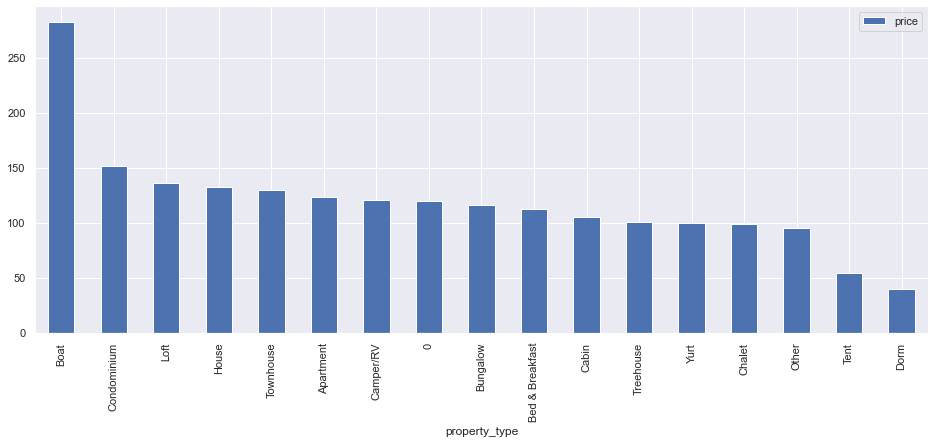

In [199]:
property_price.plot.bar(figsize = (16,6))

It can be seen that other than Boats which fetch significantly higher prices, other property types fetch similar prices in the 100-150 range, with the exception of Tents and Dorms.

In [200]:
room_type_price = listing_data[['room_type','price']].groupby(['room_type']).mean().sort_values('price', ascending=False)
print(room_type_price)

                      price
room_type                  
Entire home/apt  155.845669
Private room      75.044828
Shared room       47.547009


<AxesSubplot:xlabel='room_type'>

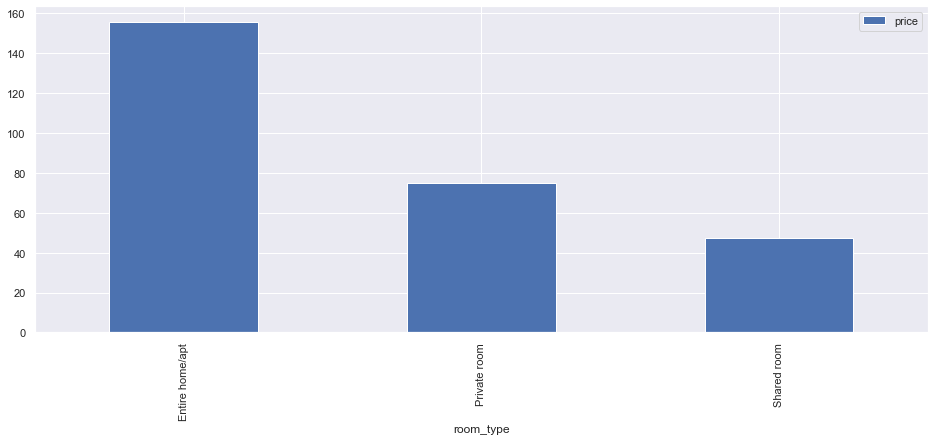

In [201]:
room_type_price.plot.bar(figsize = (16,6))

It can be seen that entire homes/apartments fetch higher prices than a single private room or a shared room.

In [202]:
instant_bookable_price = listing_data[['instant_bookable','price']].groupby(['instant_bookable']).mean().sort_values('price', ascending=False)
print(instant_bookable_price)

                       price
instant_bookable            
f                 129.194358
t                 121.289340


<AxesSubplot:xlabel='instant_bookable'>

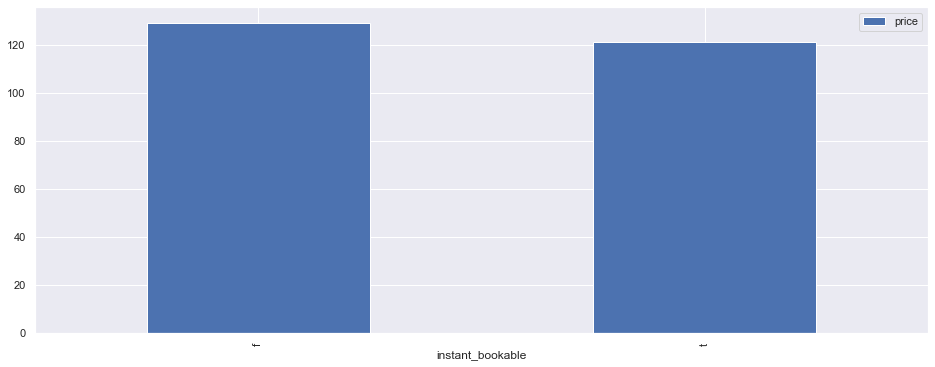

In [203]:
instant_bookable_price.plot.bar(figsize = (16,6))

Instant bookable does not affect the price from the plot above. Hence, we can remove it. 

In [204]:
cancellation_price = listing_data[['cancellation_policy','price']].groupby(['cancellation_policy']).mean().sort_values('price', ascending=False)
print(cancellation_price)

                          price
cancellation_policy            
strict               154.597036
moderate             114.747200
flexible             109.534783


<AxesSubplot:xlabel='cancellation_policy'>

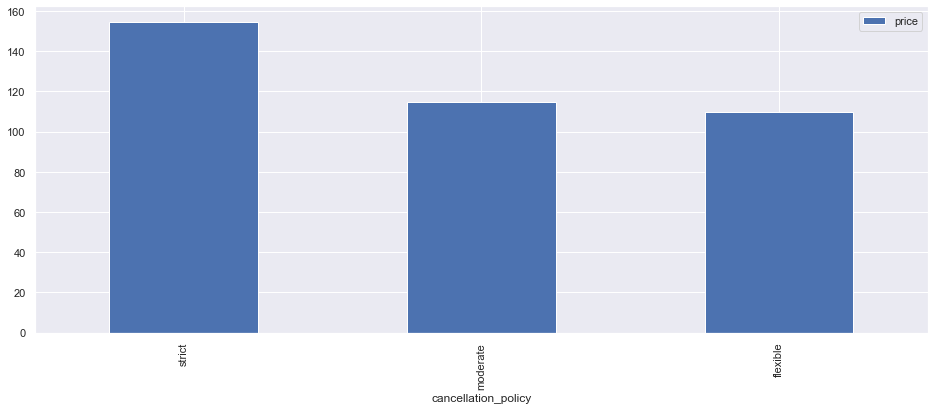

In [205]:
cancellation_price.plot.bar(figsize = (16,6))

Counter to what we thought, moderate and flexible cancellation_policy actually fetch lower prices than with a strict cancellation_policy. However, we cannot compare prices solely with cancellation_policy as the type of property or length of stay may also be factors that affect the strictness of the cancellation_policy.

### Exploration of Numeric Data 

In [206]:
# Creating DataFrames for Better Visualisation
host_total_listings_count = pd.DataFrame(listing_data["host_total_listings_count"])
accommodates = pd.DataFrame(listing_data["accommodates"])
beds = pd.DataFrame(listing_data["beds"])
price= pd.DataFrame(listing_data["price"])
security_deposit = pd.DataFrame(listing_data["security_deposit"])
cleaning_fee = pd.DataFrame(listing_data["cleaning_fee"])
extra_people = pd.DataFrame(listing_data["extra_people"])
minimum_nights = pd.DataFrame(listing_data["minimum_nights"])
no_of_rooms = pd.DataFrame(listing_data["no_of_rooms"])

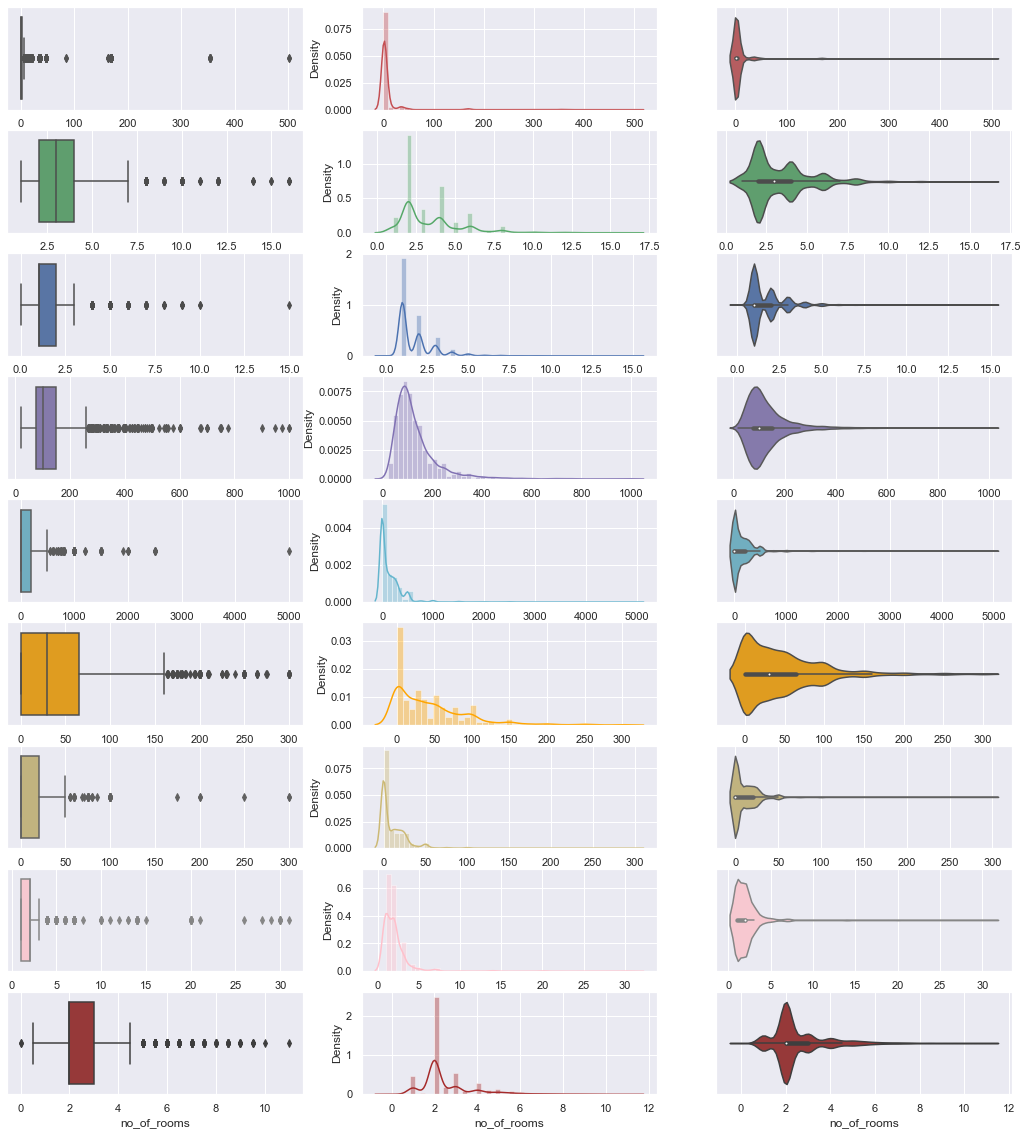

In [207]:
numdata = pd.concat([host_total_listings_count, accommodates, beds, price, 
                     security_deposit, cleaning_fee, extra_people, 
                     minimum_nights, no_of_rooms], axis = 1).reindex(beds.index)

# Draw the distributions of all variables
f, axes = plt.subplots(9, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c","orange","y","pink", "brown"]

count = 0
for var in numdata:
    sb.boxplot(numdata[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numdata[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numdata[var], color = colors[count], ax = axes[count,2])
    count += 1

In [208]:
numdata.corr()

,host_total_listings_count,accommodates,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,no_of_rooms
host_total_listings_count,1.000000,0.111302,0.085584,0.093882,-0.036644,0.208875,-0.063522,0.034679,0.071440
accommodates,0.111302,1.000000,0.860829,0.652211,0.306482,0.630574,0.148452,0.085628,0.749525
beds,0.085584,0.860829,1.000000,0.588533,0.287744,0.585565,0.130950,0.094469,0.736074
price,0.093882,0.652211,0.588533,1.000000,0.333635,0.576415,0.128007,0.096946,0.645101
security_deposit,-0.036644,0.306482,0.287744,0.333635,1.000000,0.426639,0.192317,0.138132,0.306347
cleaning_fee,0.208875,0.630574,0.585565,0.576415,0.426639,1.000000,0.153235,0.163792,0.571720
extra_people,-0.063522,0.148452,0.130950,0.128007,0.192317,0.153235,1.000000,-0.006996,0.108749
minimum_nights,0.034679,0.085628,0.094469,0.096946,0.138132,0.163792,-0.006996,1.000000,0.128199
no_of_rooms,0.071440,0.749525,0.736074,0.645101,0.306347,0.571720,0.108749,0.128199,1.000000


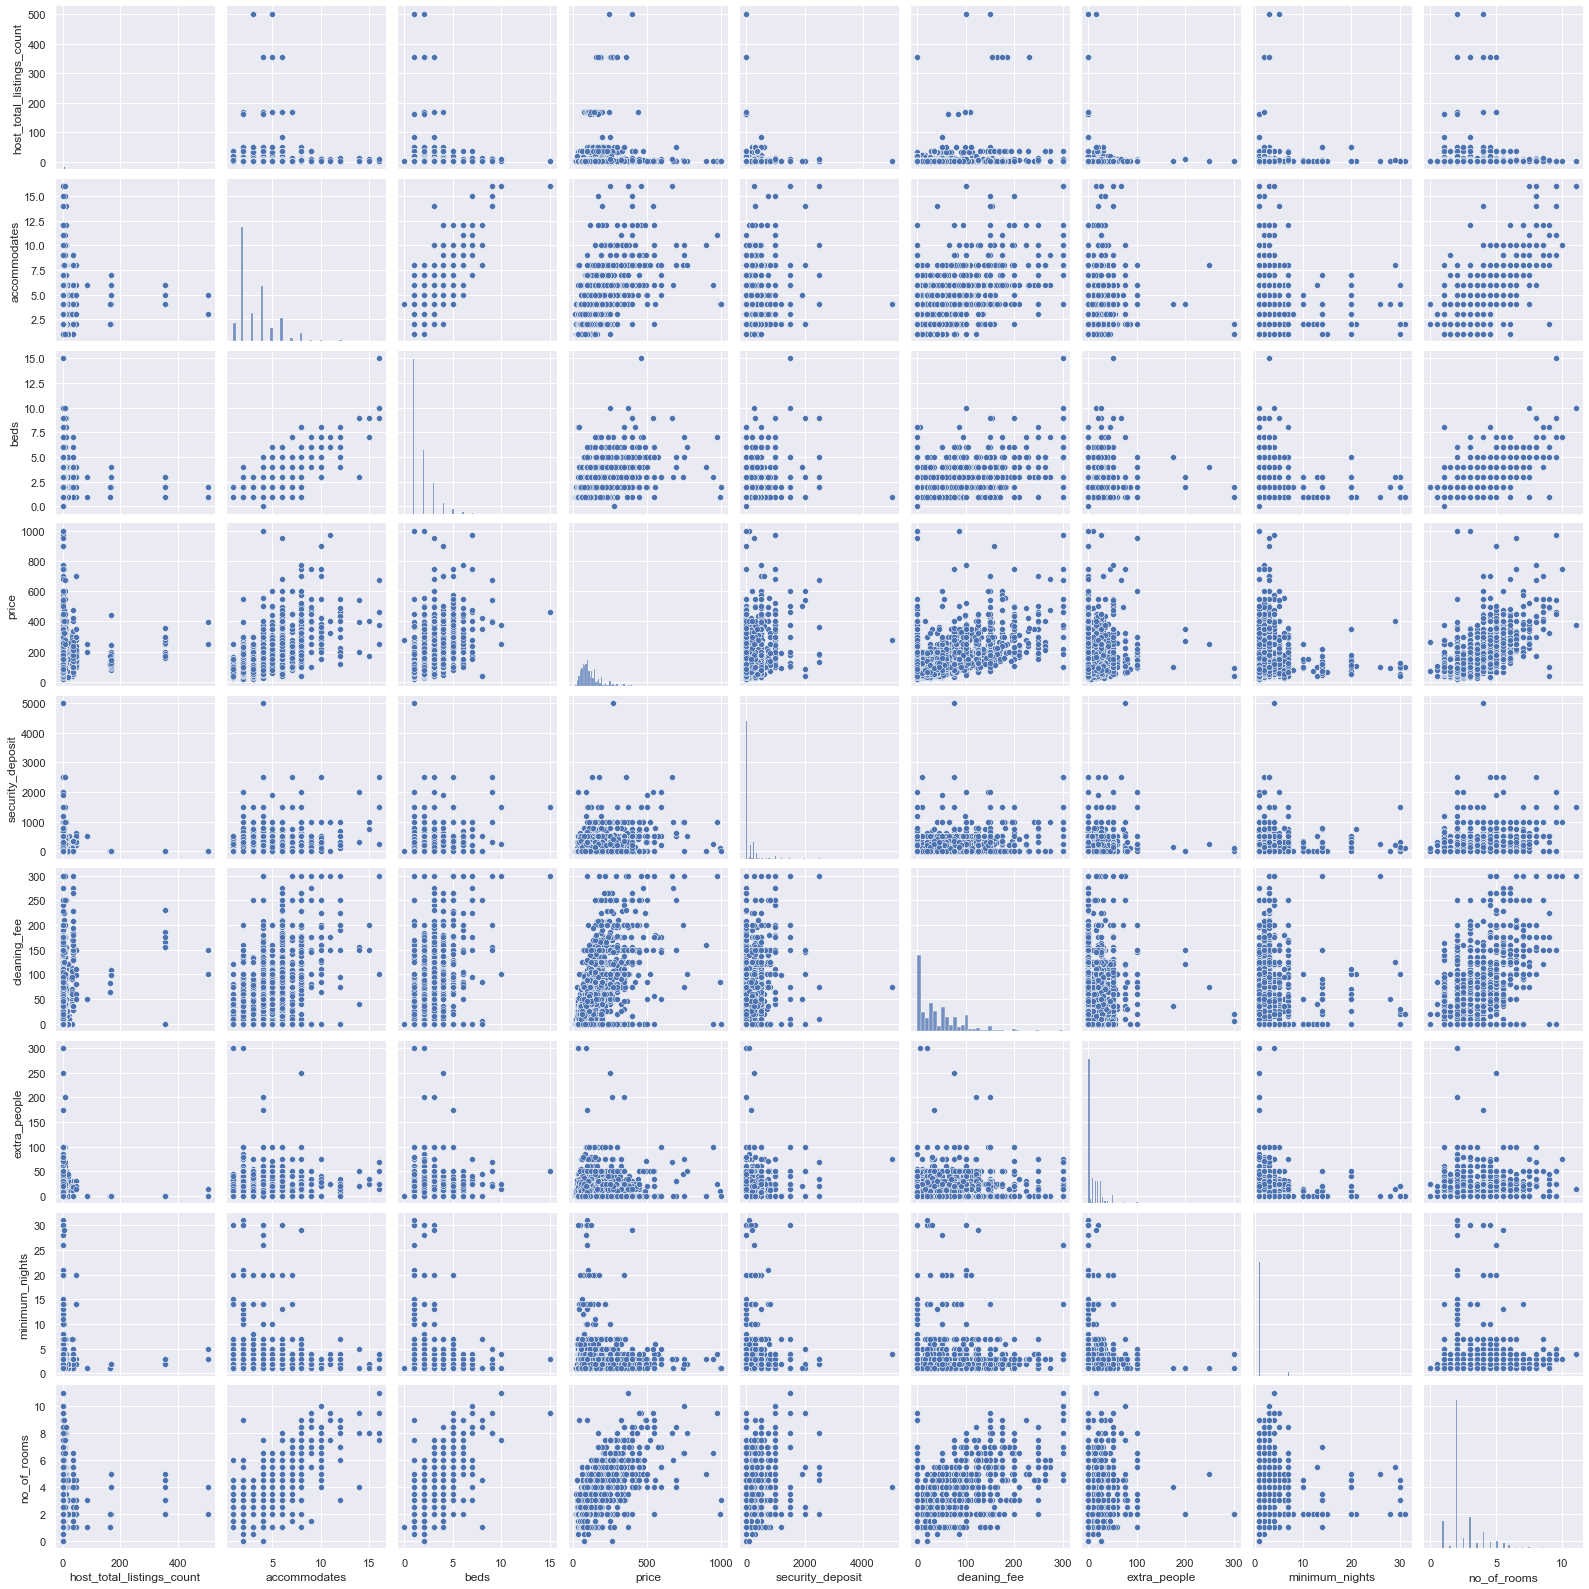

In [209]:
sb.pairplot (data = numdata)

In [210]:
# We will drop these variables as it is not necessary
listing_data.drop(['host_identity_verified','neighbourhood_cleansed','cancellation_policy', 'host_is_superhost', 'host_total_listings_count',
              'latitude','longitude','instant_bookable'], axis = 1, inplace = True)

listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  3817 non-null   object 
 1   property_type                 3817 non-null   object 
 2   room_type                     3817 non-null   object 
 3   accommodates                  3817 non-null   int64  
 4   beds                          3817 non-null   float64
 5   price                         3817 non-null   float64
 6   security_deposit              3817 non-null   float64
 7   cleaning_fee                  3817 non-null   float64
 8   extra_people                  3817 non-null   float64
 9   minimum_nights                3817 non-null   int64  
 10  no_of_rooms                   3817 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 486.9+ KB


### Create a function to check relation of  numeric variables with prices

In [211]:
# Create a Function to Fit Random Forest Regressor to the respective Dataset
# n_estimators is the no. of trees we want to build; the higher the no., the better the model but the slower the program

def rand_tree_reg(x, y, xlabel, x_grid):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
    
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    y_train_ravel = y_train.values.ravel()
    regressor.fit(x_train, y_train_ravel)
    
    y_pred_train = regressor.predict(x_train)
    y_pred_test = regressor.predict(x_test)

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train, y_pred_train))
    print('Mean Absolute Error (MAE) \t:', metrics.mean_absolute_error(y_train, y_pred_train))
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test, y_pred_test))
    print('Mean Absolute Error (MAE) \t:', metrics.mean_absolute_error(y_test, y_pred_test))
    
    x_train_value = x_train.iloc[:].values.ravel()
    y_train_value = y_train.iloc[:].values.ravel()
    y_test_value = y_test.iloc[:].values.ravel()

    #Visualising the Random Forest Regression results 

    #'arange' for creating a range of values from min value of x to max  
    #x_grid is the difference between two consecutive values 
    X_grid = np.arange(min(x_train_value), max(x_train_value), x_grid)  

    #'reshape' for reshaping the data into a len(X_grid)*1 array, to make a column out of the X_grid value                   
    X_grid = X_grid.reshape((len(X_grid), 1)) 

    #Scatter plot for original data 
    plt.scatter(x_train, y_train, color = 'pink')   

    #plot predicted data 
    plt.plot(X_grid, regressor.predict(X_grid),  
             color = 'black')  
    plt.title('Random Forest Regression') 
    plt.xlabel(xlabel) 
    plt.ylabel('Price') 
    plt.show()
    
    trainDF = pd.concat([y_train, x_train.reindex(index=y_train.index)], sort = False, axis = 1)
    f, axes = plt.subplots(1, 1, figsize=(8, 4))
    (sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")).set_ylim(2.0, 0)

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 5206.298866069762
Mean Absolute Error (MAE) 	: 46.36331673681377

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 5350.41966196958
Mean Absolute Error (MAE) 	: 46.45684799330897


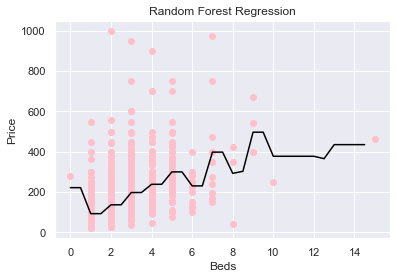

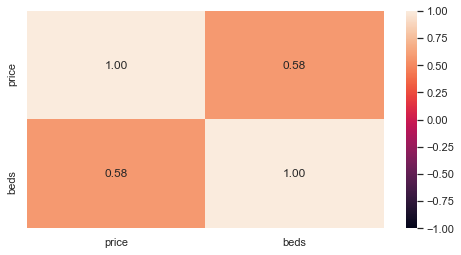

In [212]:
# For beds
rand_tree_reg(beds, price, 'Beds', 0.5)

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 7834.61035543795
Mean Absolute Error (MAE) 	: 57.46281857766744

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 6920.1065976084465
Mean Absolute Error (MAE) 	: 55.45370994191399


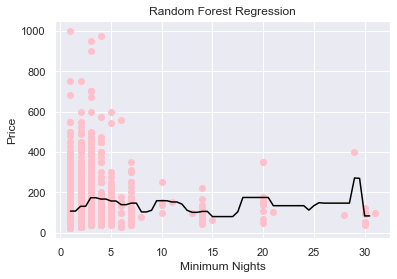

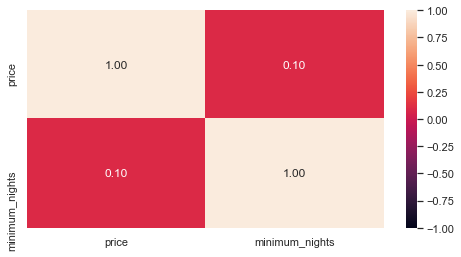

In [213]:
# For minimum_nights
rand_tree_reg(minimum_nights, price, 'Minimum Nights', 0.5)

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 4453.629385591511
Mean Absolute Error (MAE) 	: 42.68993754826748

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 6136.176245526624
Mean Absolute Error (MAE) 	: 47.5700867014931


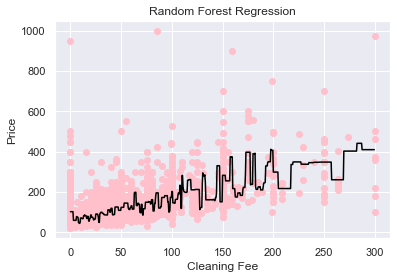

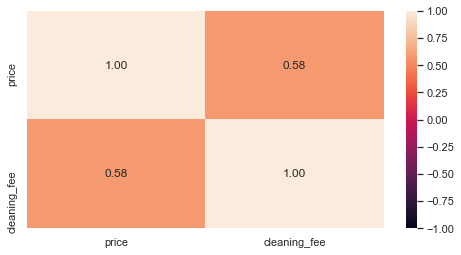

In [214]:
# For Cleaning Fees
rand_tree_reg(cleaning_fee, price, 'Cleaning Fee', 0.5)

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 4626.458526885398
Mean Absolute Error (MAE) 	: 43.57969525404978

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3635.0240938650677
Mean Absolute Error (MAE) 	: 41.57229652050296


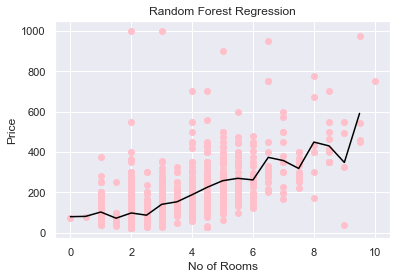

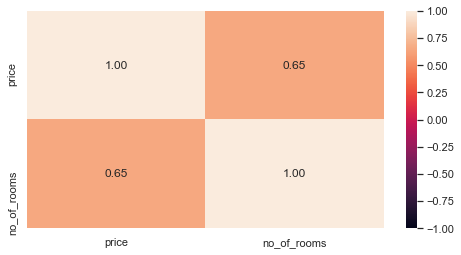

In [215]:
# For No_of_rooms
rand_tree_reg(no_of_rooms, price, 'No of Rooms', 0.5)

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 4661.614202677577
Mean Absolute Error (MAE) 	: 42.83525416317925

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 4229.56709360377
Mean Absolute Error (MAE) 	: 40.63173506300658


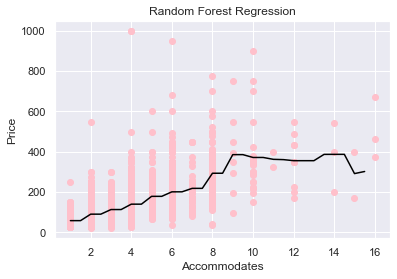

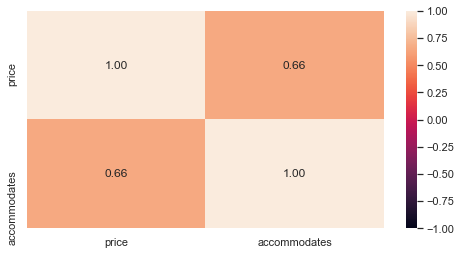

In [216]:
# For Number of People the Respective AirBnb can accommodate
rand_tree_reg(accommodates, price, 'Accommodates', 0.5)

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 6756.014146670593
Mean Absolute Error (MAE) 	: 53.54041610093107

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 7209.081106717011
Mean Absolute Error (MAE) 	: 56.63722728346768


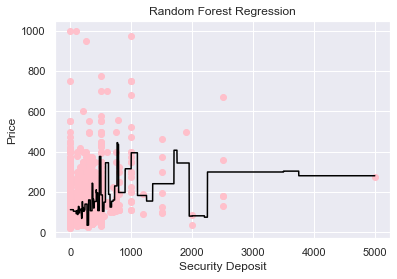

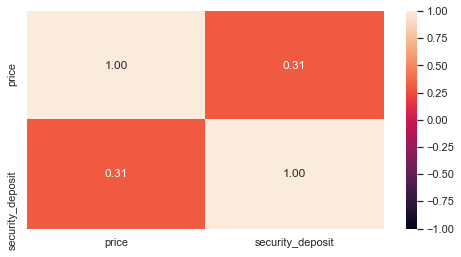

In [217]:
# For Security Deposit
rand_tree_reg(security_deposit, price, 'Security Deposit', 0.5)

In [218]:
# Remove '5000' Outlier
security_depdata = listing_data[(listing_data['security_deposit']==5000)].index
listing_data.drop(security_depdata, inplace = True)
security_deposit = pd.DataFrame(listing_data["security_deposit"])

In [219]:
# Recall all variables
beds = pd.DataFrame(listing_data["beds"])
security_deposit = pd.DataFrame(listing_data["security_deposit"])
cleaning_fee = pd.DataFrame(listing_data["cleaning_fee"])
minimum_nights = pd.DataFrame(listing_data["minimum_nights"])
no_of_rooms = pd.DataFrame(listing_data["no_of_rooms"])
accommodates = pd.DataFrame(listing_data["accommodates"])
price= pd.DataFrame(listing_data["price"])

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 6595.006320206138
Mean Absolute Error (MAE) 	: 53.851535267144115

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 7605.417816780243
Mean Absolute Error (MAE) 	: 56.436687052172594


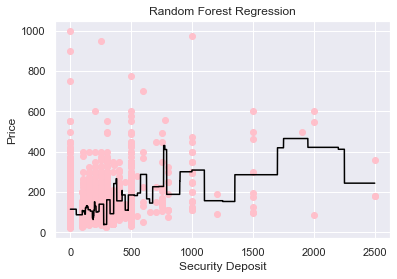

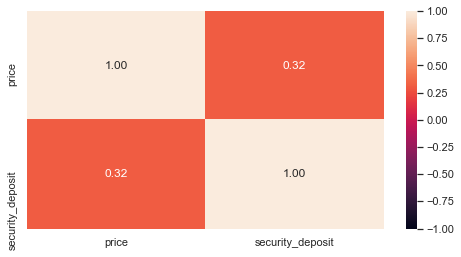

In [220]:
# Replot Regressors
rand_tree_reg(security_deposit, price, 'Security Deposit', 0.5)

# Conclusion

Note: The removal of '5000' did not affect the data greatly, and the visualizations showed no relation to Price. Therefore, we decided to remove 'security_deposit'.

Using Visualizations of Correlation and RandomForestRegressor, it is observed that 'security_deposit' and 'minimum_nights' are not strong/significant variables affecting the 'price'. Whereas 'beds', 'cleaning_fees', 'no_of_rooms' and 'accommodates' are relatively significant variables which show a healthy amount of relationship with 'price'.

**Note: Price mentioned are in terms of Datasets' currency. The factors identified are representative of this Dataset but may not be representative of other datasets.**

From the provided Dataset= listing.csv, several factors have been identified to positively affect the price of AirBnbs, and subsequently the revenue of hosts:

>1. 'neighborhood_group_cleansed'
>> From the Mean Price and Barplot Visulizations show that there is indeed a relationship between the 'neighbourhood_group' with the 'price' of the AirBnb and there is a range of price differences across the different neighbourhoods. The maximum difference is 80 Dollars from the highest priced Magnolia to lowest priced Delridge.

>2. 'property_type'
>> From the Mean Price and Barplot Visualizations shows a relationship between the 'property_type' and  'price'. Property Types which are deemed to be more luxurious for a getaway, such as boats and condominiums generally can fetch higher prices as compared to basic living quarters, such as dorms.

>3. 'room_type'
>> From the Mean Price and Barplot Visualizations show a significant relationship between the 'room_type' and 'price'. Tenants prefers renting the Entire Apartment as compared to renting a Share room. This is obvious in the disparity of a Entire Apartment fetching as high as approximately 157 Dollars, and Shared Rooms fetching only approximately 50 Dollars.

>4. 'beds'
>> From the Correlation and Random Forest Regressor Visualizations shows a relatively positive relationship between 'beds' and 'price'. Generally, the higher the number of beds, the higher the price of the AirBnb.

>5. 'cleaning_fees'
>> From the Correlation and Random Forest Regressor Visualizations shows a positive relationship between 'cleaning_fees' and 'price'. This is only reasonable as higher cleaning prices usually represent bigger or cleaner AirBnbs which will definitely fetch a higher price. However, this does not mean that Hosts should increase the Cleaning Fees to drive up the Prices of their AirBnb - doing so will only lower the tenant rate.

>6. 'no_of_room'
>> From the Correlation and Random Forest Regressor Visualizations shows a positive relationship between the 'no_of_room' and 'price'. Generally, the higher the number of rooms, the higher the price of the AirBnb.

>7. 'accomodates'
>> From the Correlation and Random Forest Regressor Visualizations shows a relatively positive relationship between the 'accomodates' and 'price'. Generally, the more occupants the AirBnb can host, the higher the price will be.



# Final Conclusion (Factors that Maximise Hosts' Revenue)

To maximise revenue of their AirBnbs, Hosts can take long term and short term approaches:

> Short Term Approaches:
    >>1. Change their Room Types allocation. Instead of setting up their AirBnbs to be shared between different groups of tenants, they should allow tenants to rent the Entire Apartment instead.
    >>2. Increase the Number of Beds available in the house, if space permits.
    >>3. Partition Apartment to have more rooms to be rented out individually, if space permits.
    >>4. Increase the number of allowed occupants, if space permits.

> Long Term Approaches:
    >>1. Purchase More Prominent Locations in Future to Set Up their AirBnb(s).
    >>2. Purchase Property Types that are deemed more luxurious by Tenants for Future AirBnb(s) considerations.
    >>3. Purchase Houses that are bigger and can accomadate more beds, rooms and occupants.
    
In general, the most ideal way to maximise revenue will be for AirBnb Hosts is to provide rentals in a prominent location, a decent property size so as to accommodate more beds, rooms and occupants comfortably and lastly rent out the Entire Apartment instead of renting rooms to be shared amongst different tenants.

# 2. Identify and Determine the Best Regression Model for this Specific AirBnb Dataset

Note: It is required for us to change String Categorical Variables to Numeric Variables before we can utilize the various Regression Models. We will do so accordingly, and each String Categorical will be replaced by a Specific Numeral.

In [221]:
neighbourhood_price = listing_data[['neighbourhood_group_cleansed','price']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('price', ascending=False)
print(neighbourhood_price)

                                   price
neighbourhood_group_cleansed            
Magnolia                      177.672131
Queen Anne                    156.823129
Downtown                      154.405660
West Seattle                  141.359606
Cascade                       140.101124
Capitol Hill                  130.558304
Central Area                  128.338753
Ballard                       124.682609
Other neighborhoods           119.968514
Interbay                      109.727273
Seward Park                   108.477273
Beacon Hill                    94.669492
University District            93.639344
Lake City                      92.671642
Rainier Valley                 91.899371
Northgate                      88.550000
Delridge                       83.278481


In [222]:
# Replacement for Room Type Datas
listing_data["room_type"].replace({"Entire home/apt":0, "Private room":1, "Shared room":2}, inplace=True)

# Replacement for Neighbourhood Groups
listing_data['neighbourhood_group_cleansed'].replace({'Magnolia':0,'Queen Anne':1,'Downtown':2,'West Seattle':3,'Cascade':4,
                                                 'Capitol Hill':5,'Central Area':6,'Ballard':7,'Other neighborhoods':8,
                                                 'Interbay':9,'Seward Park':10,'Beacon Hill':11,'University District':12,
                                                 'Lake City':13,'Rainier Valley':14,'Northgate':15,'Delridge':16},
                                                inplace=True)

# Replacement for Property Types
listing_data["property_type"].replace({"Boat":0, "Condominium":1, "Loft":2, "House":3, "Townhouse":4, "Apartment":5,
                                     "Camper/RV":6, "Bungalow":7, "Bed & Breakfast":8, "Cabin":9,
                                    "Treehouse":10 , "Yurt":11, "Chalet":12, "Other":13, "Tent":14,
                                    "Dorm":15}, inplace=True)

In [223]:
# Setting up for Multivariate Regression Model to be compared against 'Price'
X = listing_data[['neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'cleaning_fee','no_of_rooms','beds']]
y = listing_data['price']

# Random Split Data into Train and Test Set.
# Test Size is 25%
# Random State is stated to ensure we can accurately analysis data even if we restart the whole Programme.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [224]:
# Create Function for Multivariate Random Forest Regressor
# Using hyperparameters for Random Forest Regressor
def multi_forest(X_train, X_test, y_train, y_test):
    forest = RandomForestRegressor()
    forest.fit(X_train, y_train)
 
    y_pred_train = forest.predict(X_train)
    y_pred_test = forest.predict(X_test)

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train, y_pred_train))
    print('Mean Absolute Error (MAE) \t:', metrics.mean_absolute_error(y_train, y_pred_train))
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test, y_pred_test))
    print('Mean Absolute Error (MAE) \t:', metrics.mean_absolute_error(y_test, y_pred_test))

    f, axes = plt.subplots(1, 2, figsize=(24, 8))
    axes[0].scatter(y_train, y_pred_train, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth =1)
    axes[0].grid()
    axes[0].set_xlabel('True values of the Response Variable (Train)')
    axes[0].set_ylabel('Predicted values of the Response Variable (Train)')
    axes[0].set_title('Scatter plot from actual y_train and predicted y_train')
    axes[1].scatter(y_test, y_pred_test, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].grid()
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    axes[1].set_title('Scatter plot from actual y_test and predicted y_test')
    plt.show()
    print()
    print('Intercept of Regression \t: b = ', forest.predict([[0, 0, 0, 0, 0, 0, 0]]))
    feature_importances_forest = pd.DataFrame(forest.feature_importances_,index = X_train.columns,columns=['Variables']).sort_values('Variables',ascending=False)
    print()
    print(feature_importances_forest)
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
    return comparison

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 842.0557080117292
Mean Absolute Error (MAE) 	: 16.835645078127296

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3950.6142603095377
Mean Absolute Error (MAE) 	: 37.19986892340238


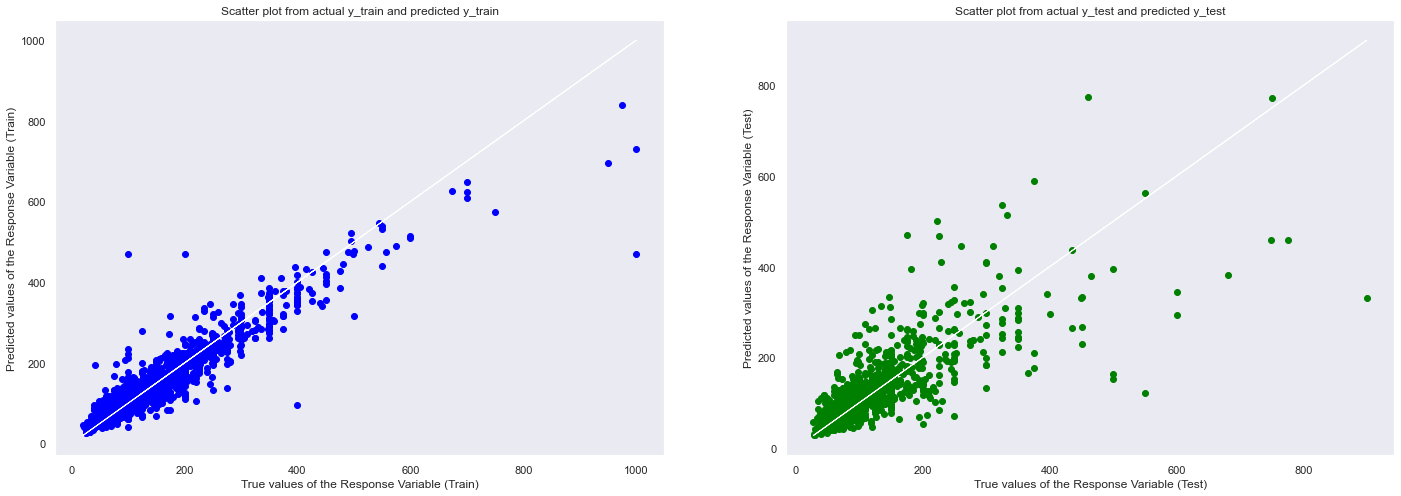


Intercept of Regression 	: b =  [116.59767674]

                              Variables
no_of_rooms                    0.458760
cleaning_fee                   0.169618
neighbourhood_group_cleansed   0.108225
room_type                      0.092817
accommodates                   0.070989
beds                           0.052037
property_type                  0.047555


,Actual,Predicted
1079,170.0,124.147250
1958,60.0,59.012667
2696,110.0,122.496096
2003,95.0,96.799857
1214,225.0,180.866333
...,...,...
472,300.0,297.530000
2459,138.0,145.963333
3690,35.0,49.824500
760,70.0,102.210667


In [225]:
multi_forest(X_train, X_test, y_train, y_test)

In [226]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#Create Function for Multivariate Linear Regressor
def multi_linear(X_train, X_test, y_train, y_test):
    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Predict the Total values from Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 8))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print('Mean Absolute Error (MAE) \t:', metrics.mean_absolute_error(y_train, y_train_pred))
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print('Mean Absolute Error (MAE) \t:', metrics.mean_absolute_error(y_test, y_test_pred))

    # Coefficients of the Linear Regression line
    print()
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    feature_importances_normal = pd.DataFrame(linreg.coef_,index = X_train.columns,columns=['Variables']).sort_values('Variables',ascending=False)
    print()
    print(feature_importances_normal)

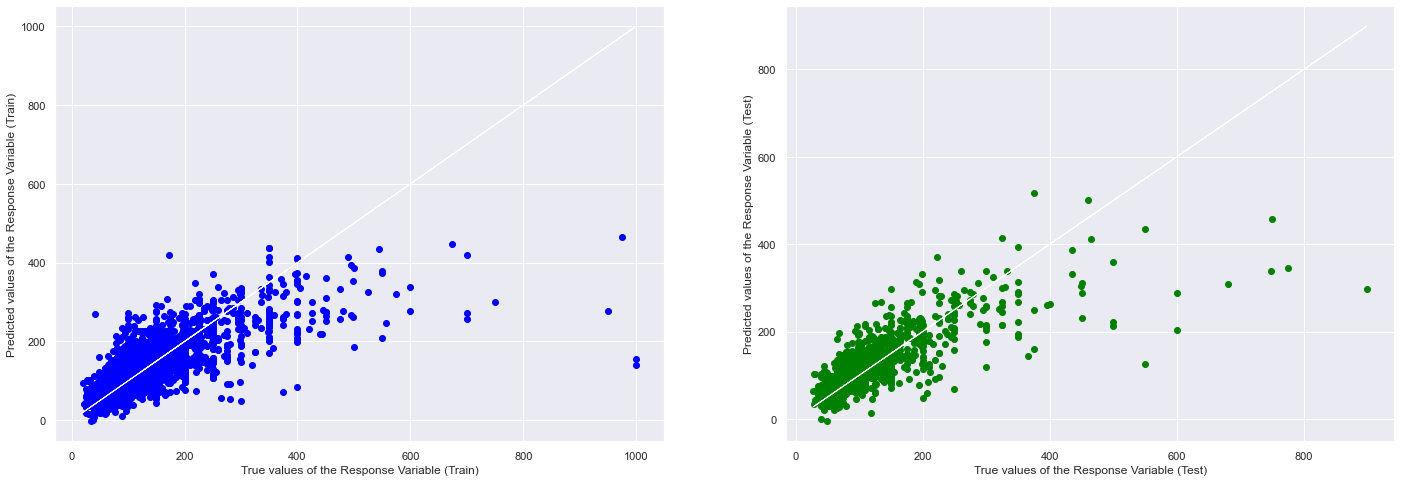

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 3486.5709313850725
Mean Absolute Error (MAE) 	: 35.56956662978696

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3662.004783153013
Mean Absolute Error (MAE) 	: 35.966847038097846

Intercept of Regression 	: b =  63.45679135393249

                              Variables
no_of_rooms                   26.737354
accommodates                   7.224440
cleaning_fee                   0.257130
beds                          -0.180586
property_type                 -1.076680
neighbourhood_group_cleansed  -3.610667
room_type                    -33.776365


In [227]:
multi_linear(X_train, X_test, y_train, y_test)

In [228]:
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

#Create Function for Multivariate SGD Regressor
def multi_SGD(X_train, X_test, y_train, y_test):
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_array = scaler.transform(X_train)
    X_test_array =scaler.transform(X_test)

    y_test_array=np.array(y_test)

    SGD = SGDRegressor(max_iter=1000, random_state = 50)
    SGD.fit(X_train_array, y_train)
    y_pred_train = SGD.predict(X_train_array)
    y_pred_test = SGD.predict(X_test_array)

    f, axes = plt.subplots(1, 2, figsize=(24, 8))
    axes[0].scatter(y_train, y_pred_train, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth =1)
    axes[0].grid()
    axes[0].set_xlabel('True values of the Response Variable (Train)')
    axes[0].set_ylabel('Predicted values of the Response Variable (Train)')
    axes[0].set_title('Scatter plot from actual y_train and predicted y_train')
    axes[1].scatter(y_test, y_pred_test, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].grid()
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    axes[1].set_title('Scatter plot from actual y_test and predicted y_test')
    plt.show()

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_pred_train))
    print('Mean Absolute Error (MAE) \t:', metrics.mean_absolute_error(y_train, y_pred_train))
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred_test))
    print('Mean Absolute Error (MAE) \t:', metrics.mean_absolute_error(y_test, y_pred_test))
    print()
    print('Intercept of Regression \t: b = ', SGD.intercept_)

    feature_importances_SGD = pd.DataFrame(SGD.coef_,index = X_train.columns,columns=['Variables']).sort_values('Variables',ascending=False)
    print()
    print(feature_importances_SGD)

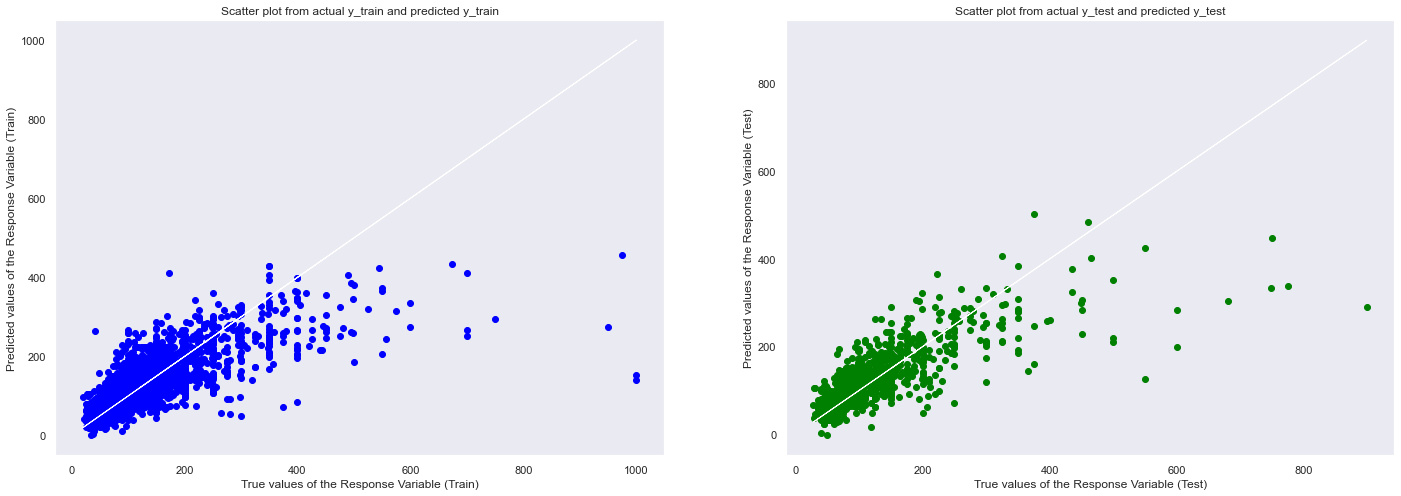

Goodness of Fit of Model 	Train Dataset
Mean Squared Error (MSE) 	: 3490.590462542279
Mean Absolute Error (MAE) 	: 35.41212146134671

Goodness of Fit of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3669.624029529467
Mean Absolute Error (MAE) 	: 35.653437698022465

Intercept of Regression 	: b =  [127.19192533]

                              Variables
no_of_rooms                   34.736264
accommodates                  13.401064
cleaning_fee                  12.165261
beds                          -0.846305
property_type                 -1.504416
neighbourhood_group_cleansed -13.951650
room_type                    -17.746238


In [229]:
multi_SGD(X_train, X_test, y_train, y_test)

In [230]:
#To Determine the R^2 and Adjusted R^2
def metrics(model, X_train, X_test, y_train, y_test):
    if model == 'forest':
        model = RandomForestRegressor(n_estimators = 100, random_state = 50, max_depth = 5,\
                              min_samples_split = 24, min_samples_leaf=8)
        model.fit(X_train, y_train)
    if model == 'linreg':
        model = LinearRegression()  
        model.fit(X_train, y_train)        
    if model == 'SGD':
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test =scaler.transform(X_test)

        y_test=np.array(y_test)

        model = SGDRegressor(max_iter=1000, random_state = 50)
        model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    SS_Residual = sum((y_test-y_pred)**2)
    SS_Total = sum((y_test-np.mean(y_test))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print('R^2 \t\t= ', round(r_squared, 4))
    print('Adjusted R^2 \t= ', round(adj_r_squared, 4))

In [231]:
#To Determine the R^2 and Adjusted R^2
def metrics(model, X_train, X_test, y_train, y_test):
    if model == 'forest':
        model = RandomForestRegressor(n_estimators = 100, random_state = 50, max_depth = 5,\
                              min_samples_split = 24, min_samples_leaf=8)
        model.fit(X_train, y_train)
    if model == 'linreg':
        model = LinearRegression()  
        model.fit(X_train, y_train)        
    if model == 'SGD':
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test =scaler.transform(X_test)

        y_test=np.array(y_test)

        model = SGDRegressor(max_iter=1000, random_state = 50)
        model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    SS_Residual = sum((y_test-y_pred)**2)
    SS_Total = sum((y_test-np.mean(y_test))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print('R^2 \t\t= ', round(r_squared, 4))
    print('Adjusted R^2 \t= ', round(adj_r_squared, 4))

In [232]:
#R^2 and Adjusted R^2 for Forest Regressor
print('Forest Regressor'.upper())
metrics('forest',X_train, X_test, y_train, y_test)
print('-'*60)


#R^2 and Adjusted R^2 for Linear Regressor
print('Linear Regressor'.upper())
metrics('linreg', X_train, X_test, y_train, y_test)
print('-'*60)

#R^2 and Adjusted R^2 for SGD Regressor
print('SGD Regressor'.upper())
metrics('SGD', X_train, X_test, y_train, y_test)

FOREST REGRESSOR
R^2 		=  0.6032
Adjusted R^2 	=  0.6002
------------------------------------------------------------
LINEAR REGRESSOR
R^2 		=  0.5918
Adjusted R^2 	=  0.5887
------------------------------------------------------------
SGD REGRESSOR
R^2 		=  0.5909
Adjusted R^2 	=  0.5879


# Conclusion (Best Regressor Model for Current Dataset)

Since the Adjusted R^2 adjusts the statistics based on the Number of Variables, therefore it is a better indicator as compared to R^2. As such, we will compare the Adjusted R^2 values for each Regressor Model. 

From the results, it seems that the Adjusted R^2 values are generally quite similar across the board, but **Forest Regressor** is the best model in this case, with the highest value of 0.6002.

The Adjusted R^2 may be inaccurate if we have chosen poor quality indicators. An assumption we made is that we have chosen good indicators based on the data exploration we have done. In any case, if we were to utilize R^2 values instead, **Forest Regressor** still proves to be the better Regressor Model for this Dataset.

The results are consistent with what we have expected and that is Forest Regressor is the better model as it uses a Combination of Decision Trees on various sub-samples of data and uses averaging along the way to increase accuracy and prevent overfitting, as compared to Linear Regression, which does not. Linear Regression assumes the data is linearly related and tries to fit the data in a linear relationship, however, this may not be the case as the data may be non-linearly related.

In addition, we expected Random Forest Regressor to be a better model than SGDRegressor as SGDRegressor is not very reliable. SGDRegressor picks data randomly to adjust its model and while it may work at certain times, it may not work when the data selected happens to be biased (e.g. the data chosen is coincendentally consistently small). Due to its randomacy, SGDRegressor is especially unreliable on larger datasets and may not provide optimal results (e.g. data chosen is consistently small skew the values obtained). Similarly, for datasets with different factors of different scale, SGDRegressor is unrelaible as it is sensitive to feature scaling. In our case, although we do not have a lot of factors, most of our factors are of different scales which makes SGDRegressor more inaccurate. 

Having said that, SGDRegressor may be the Regressor of choice if the data is extremely large or only a rough gauge is required as SGDRegressor runs faster and requires a smaller amount of memory space, hence making it more effiicent.

Furthermore, one disadvantage of using Random Forest Regressor is that the model is unable to discover trends beyond the maximum and minimum values of the training dataset. When it is faced with such a situation, the regressor will assume that the prediction will fall close to the maximum or minimum value in the training set.